In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("Churn_Modelling.csv")

In [13]:
data.head() #univariate analysis

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


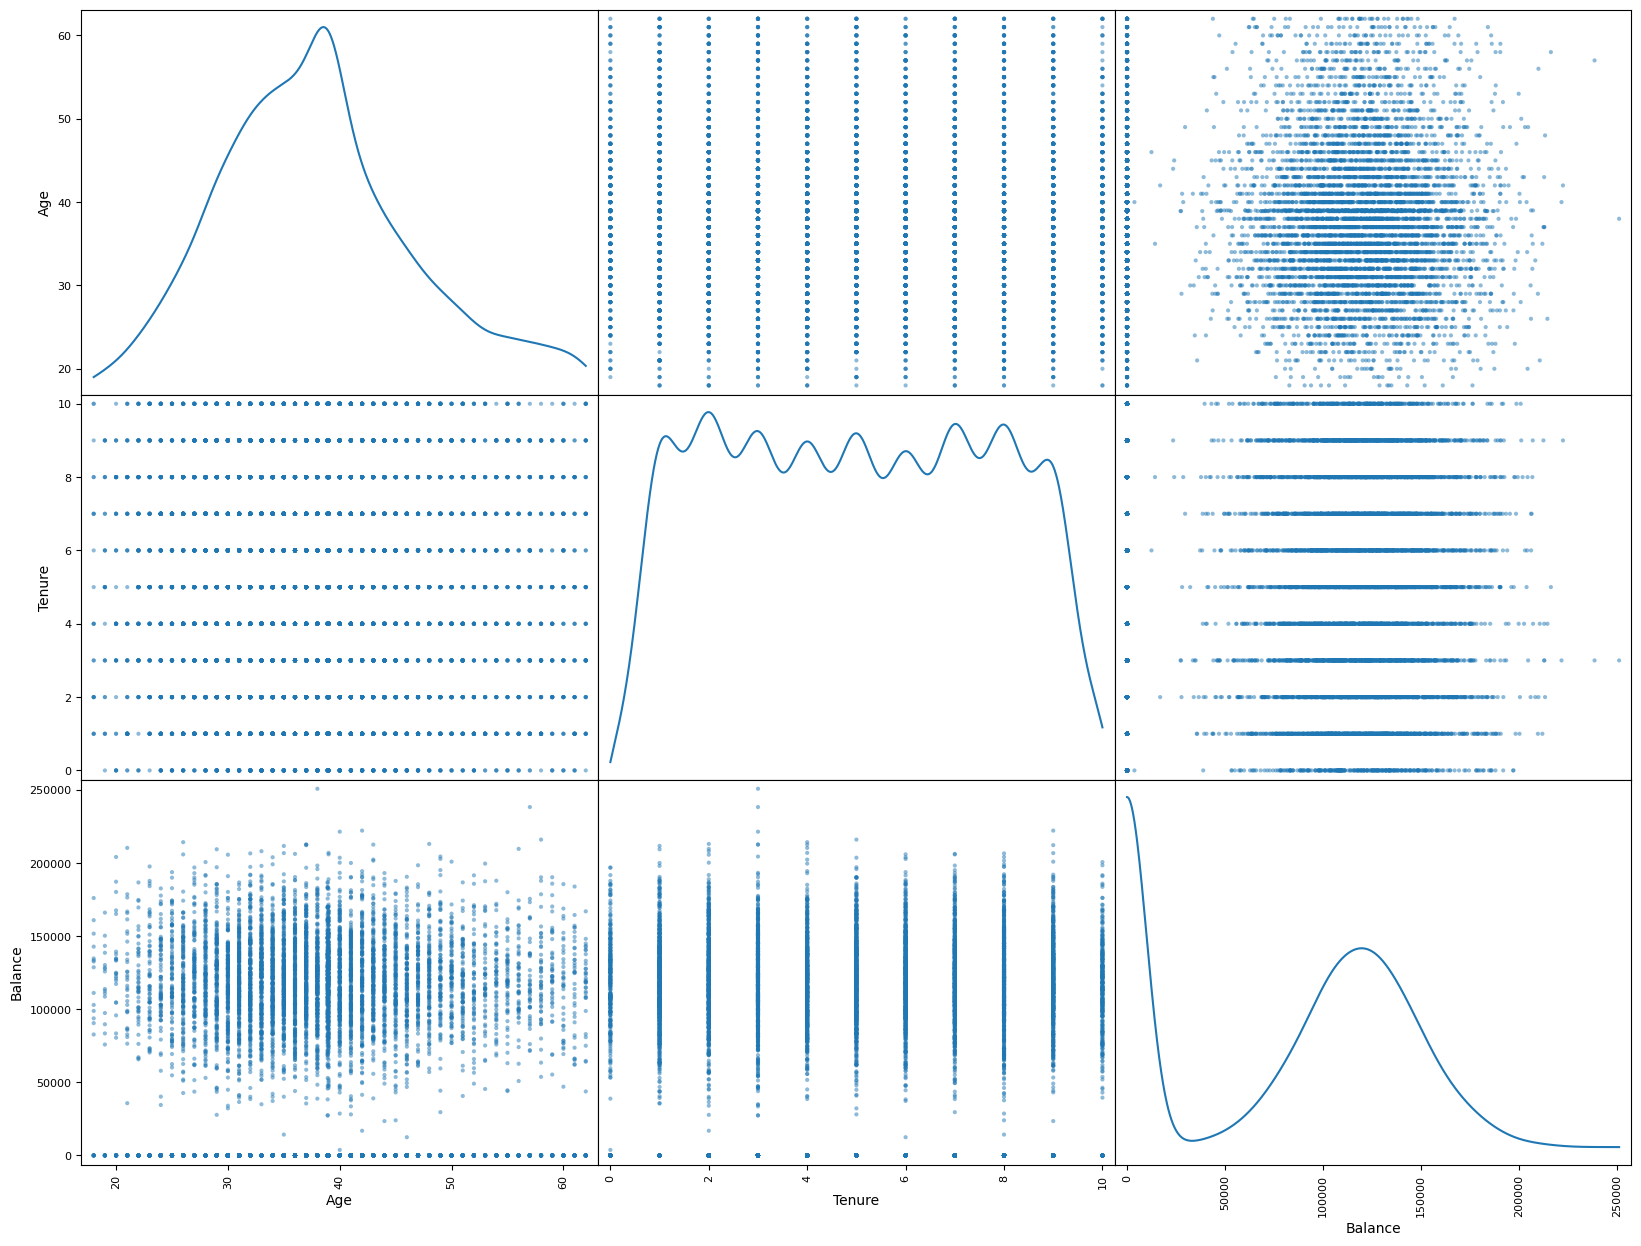

In [34]:
pd.plotting.scatter_matrix(data.loc[:, "Age":"Balance"], diagonal="kde",figsize=(20,15))
plt.show() #multivariate analysis

In [35]:
data.mean() #discriptive analysis

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_18284\1589793645.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean() #discriptive analysis


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.783229e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [36]:
data.isnull().sum() #missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [37]:
import seaborn as sns

In [58]:
q = data.quantile(q=[0.25,0.75]) #0utlier detection using upper and lower extreme
q

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_18284\822164256.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q = data.quantile(q=[0.25,0.75]) #0utlier detection using upper and lower extreme


,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,0.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,1.0,43.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [39]:
IQR = q.loc[0.75]-q.loc[0.25]
IQR

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    11.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [40]:
upper_ex = q.loc[0.75]+1.5*IQR
upper_ex

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                5.950000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [41]:
lower_ex = q.loc[0.25]-1.5*IQR
lower_ex

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.550000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [42]:
data[data['Age']>62]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [43]:
data[data['Age']<14]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [44]:
data['Age'] = np.where(data['Age']>62,data['Age'].mean(),data['Age']) #replacing the outliers using mean value

In [45]:
data[data['Age']>62]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [46]:
data.head() #encoding

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [47]:
pd.get_dummies(data,columns=['Surname']) #encoding method-1

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,Surname_Zinachukwudi,Surname_Zito,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva
0,1,15634602,619,France,Female,42.0,2,0.00,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,Spain,Female,41.0,1,83807.86,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,15619304,502,France,Female,42.0,8,159660.80,3,1,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,France,Female,39.0,1,0.00,2,0,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,Spain,Female,43.0,2,125510.82,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39.0,5,0.00,2,1,...,0,0,0,0,0,0,0,0,0,0
9996,9997,15569892,516,France,Male,35.0,10,57369.61,1,1,...,0,0,0,0,0,0,0,0,0,0
9997,9998,15584532,709,France,Female,36.0,7,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
9998,9999,15682355,772,Germany,Male,42.0,3,75075.31,2,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
data['Geography'] = le.fit_transform(data['Geography']) #method-2 (label encoding)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [53]:
#seperating dependent and independent variables
y = data['Exited']
x = data.iloc[:,0:14]

In [54]:
#splitting the data into train and test 
from sklearn.model_selection import  train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [56]:
x_train.shape

(8000, 14)

In [57]:
x_test.shape

(2000, 14)